In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('/Users/hyeom/Documents/GitHub/advanced_project/jiwon_project/csv_files/prerocessing.csv')

In [19]:
use = ['room_type', 'structure_type', 'price']

In [33]:
df['structure_type'] = df['structure_type'].replace('private room', 'rental unit')

df.to_csv('/Users/hyeom/Documents/GitHub/advanced_project/jiwon_project/csv_files/prerocessing.csv', index=False)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22308 entries, 0 to 22307
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           22308 non-null  float64
 1   room_type       22308 non-null  object 
 2   structure_type  22308 non-null  object 
dtypes: float64(1), object(2)
memory usage: 523.0+ KB


In [25]:
df.groupby('room_type')['structure_type'].value_counts(normalize=True)

room_type        structure_type    
Entire home/apt  rental unit           0.761845
                 home                  0.083623
                 condo                 0.054564
                 townhouse             0.026532
                 loft                  0.022979
                 guest suite           0.021478
                 serviced apartment    0.011450
                 place                 0.004817
                 aparthotel            0.004185
                 guesthouse            0.003001
                 vacation home         0.001263
                 bungalow              0.001027
                 tiny home             0.000711
                 camper/rv             0.000632
                 villa                 0.000553
                 boat                  0.000395
                 houseboat             0.000316
                 tower                 0.000237
                 casa particular       0.000158
                 cottage               0.000158
    

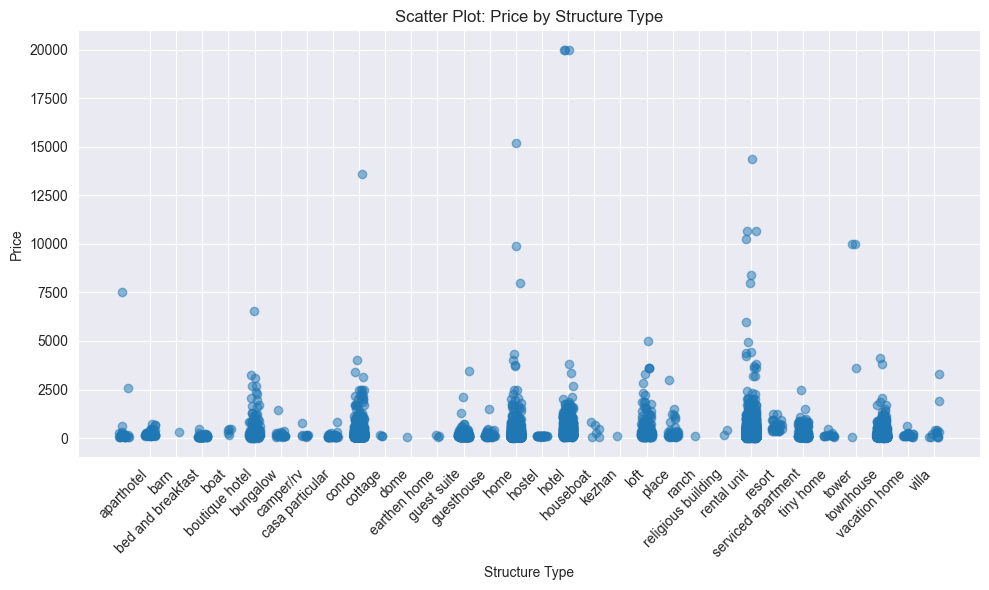

In [8]:
cat = df['structure_type'].astype('category')
codes = cat.cat.codes
categories = cat.cat.categories

# x축에 약간의 노이즈(jitter) 추가
jitter = np.random.uniform(-0.2, 0.2, size=len(df))
x = codes + jitter
y = df['price'].astype(float)

# 산점도
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.xticks(range(len(categories)), categories, rotation=45, ha='right')
plt.xlabel('Structure Type')
plt.ylabel('Price')
plt.title('Scatter Plot: Price by Structure Type')
plt.tight_layout()
plt.show()


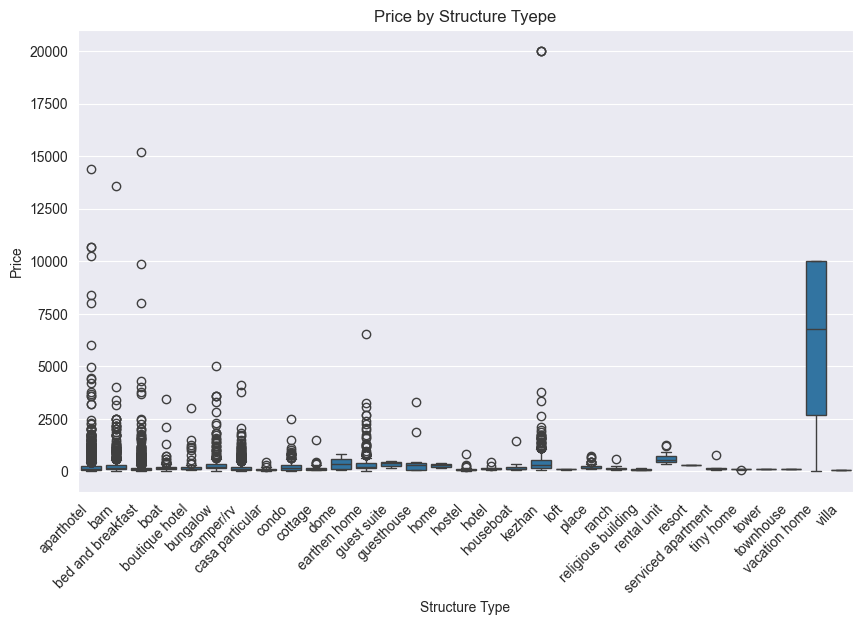

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='structure_type',
    y='price',
    data=df,
    showfliers=True       # ← 이상치(점) 표시 안 함
)

plt.xticks(range(len(categories)), categories, rotation=45, ha='right')
plt.title('Price by Structure Tyepe')
plt.xlabel('Structure Type')
plt.ylabel('Price')
plt.show()

In [22]:
def outlier_stats(s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    mask = (s < lower) | (s > upper)
    return pd.Series({'outlier_count': int(mask.sum()),'outlier_ratio': mask.mean()})

stats_cat = df.groupby("structure_category")['price'] \
              .apply(outlier_stats) \
              .reset_index()

total_cat_outliers = stats_cat['outlier_count'].sum()

print("== structure_category별 ==")
print(f"\n전체 이상치 개수: {total_cat_outliers}개")
print(stats_cat.to_string(index=False))


stats_type = df.groupby("structure_type")[col] \
               .apply(outlier_stats) \
               .reset_index()

total_type_outliers = stats_type['outlier_count'].sum()

print("\n== structure_type별 ==")
print(f"\n전체 이상치 개수: {total_type_outliers}개")
print(stats_type.to_string(index=False))




KeyError: 'outlier_count'